<a href="https://colab.research.google.com/github/huaizhic/djikstra-implementation-analysis/blob/main/Algo_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part A (Theoretical)
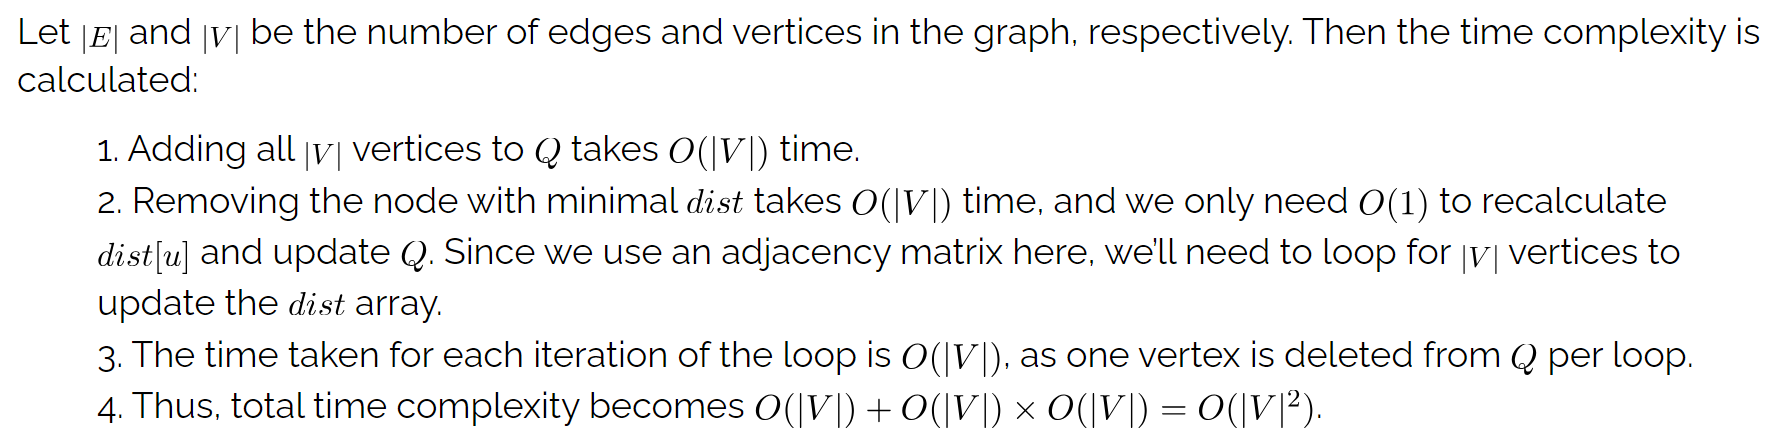

source: https://www.baeldung.com/cs/dijkstra-time-complexity

#Part A (Empirical)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

def generateAdjMatrix(V = 5):
    # Set the parameters for your random weighted directed graph
    num_nodes = V  # Number of nodes in the graph
    density = 0.3  # Density of the graph (0.0 to 1.0)
    min_weight = 1  # Minimum weight for edges
    max_weight = V  # Maximum weight for edges

    # Create an empty adjacency matrix filled with zeros
    adj_matrix = np.zeros((num_nodes, num_nodes))

    # Generate random weights for the directed edges based on the specified density
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and random.random() < density:  # Avoid self-loops
                weight = random.randint(min_weight, max_weight)
                adj_matrix[i][j] = weight
    return adj_matrix

def generateGraph(adjacency_matrix):
    size = len(adjacency_matrix)
    vertices = np.arange(size)
    edges = []
    # print(adjacency_matrix)
    for i in range(size):
        for j in range(i+1, size):
            if adjacency_matrix[i][j] > 0:
                edges.append((i, j, adjacency_matrix[i][j]))

    # print(edges)
    # return
    G=nx.DiGraph()
    G.add_weighted_edges_from(edges)
    nx.draw_networkx(G)
    plt.show()

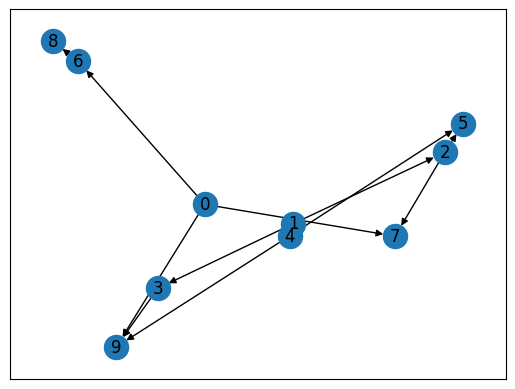

In [ ]:
adj_matrix = generateAdjMatrix(10)
generateGraph(adj_matrix)

In [ ]:
print(adj_matrix)

[[ 0.  0.  0.  0.  0.  0.  9.  9.  0.  8.]
 [ 4.  0.  8. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  9.  0.  1.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.  7.]
 [ 0.  0.  2.  4.  0.  6.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  3.  0.  9.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  8.  4.  0.  8.  5.  0.  0.  0.]]


In [ ]:
def dijkstra(adj_matrix, start_node):
    num_nodes = len(adj_matrix)

    distances = [float('inf')] * num_nodes
    distances[start_node] = 0

    # Priority queue represented as a list
    priority_queue = [(0, start_node)]

    while priority_queue:
        # print("Unsorted:",priority_queue)
        priority_queue.sort()  # Sort the priority queue based on the first element of the tuple
        # print("Sorted:", priority_queue)
        current_distance, current_node = priority_queue.pop(0)

        for neighbor in range(num_nodes):
            if adj_matrix[current_node][neighbor] > 0:
                new_distance = current_distance + adj_matrix[current_node][neighbor]

                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    priority_queue.append((new_distance, neighbor))

    return distances

In [ ]:
from bisect import bisect_left

def dijkstra_shortestpath(adj_matrix, start_node):
    num_nodes = len(adj_matrix)

    d = [float('inf')] * num_nodes  # O(n)
    pi = [None] * num_nodes         # O(n)
    S = [0] * num_nodes             # O(n)

    d[start_node] = 0
    Q = [(v, w) for v, w in enumerate(d)]   # O(n)
    # Q = []
    # print(Q)
    while Q:
        u = Q[0][0]
        S[u] = 1
        for v in range(len(adj_matrix[u])):
            if adj_matrix[u][v] > 0:
                # print(S[v] != 1 and d[v] > d[u] + adj_matrix[u][v])
                # print(S[v])
                # print(d[v])
                # print(d[u])
                # print(adj_matrix[u][v])
                # return
                if S[v] != 1 and d[v] > d[u] + adj_matrix[u][v]:
                    Q = [tup for tup in Q if tup[0] != v]
                    d[v] = d[u] + adj_matrix[u][v]
                    pi[v] = u
                    Q.insert(bisect_left([t[1] for t in Q], d[v]), (v, d[v]))

# adj_matrix = generateAdjMatrix(10)
# print(adj_matrix)
# dijkstra_shortestpath(adj_matrix, 0)

In [ ]:
from time import process_time, process_time_ns
from tqdm import tqdm

arrayV = [i*10 for i in range(1, 101)]
print(arrayV)
adj_matrices = []
timeTakenV = []
# results = []
# print(arrayV)

for V in tqdm(arrayV, desc="Running..."):
    avgTime = []
    for i in range(30):
        adj_matrix = generateAdjMatrix(V)
        adj_matrices.append(adj_matrix)
        # print(V)
        start = process_time()
        # results.append(dijkstra(adj_matrix, 0))
        source = random.randint(0, V-1)
        dijkstra(adj_matrix, source)
        end = process_time()
        avgTime.append(end-start)
    timeTakenV.append(np.average(avgTime))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


Running...: 100%|██████████| 100/100 [58:15<00:00, 34.96s/it] 


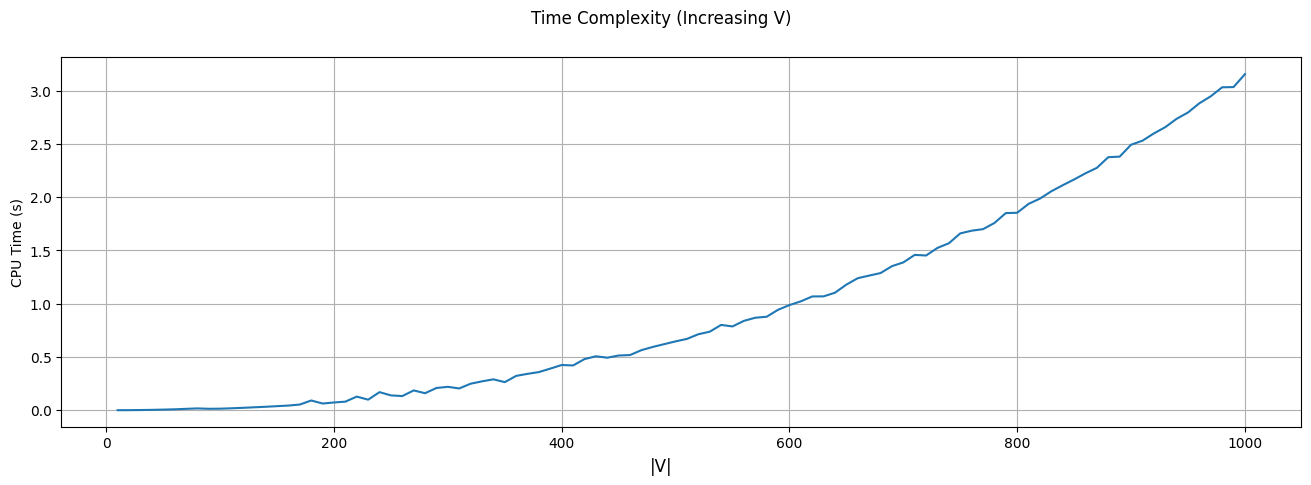

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 4.8))

fig.supxlabel("|V|")
fig.suptitle("Time Complexity (Increasing V)")
ax1.plot(arrayV, timeTakenV)
ax1.set_ylabel("CPU Time (s)")
# ax1.set_xticks(arrayV)
ax1.ticklabel_format(style="plain")
ax1.grid()

In [ ]:
def generateAdjMatrixE(V, E):
    # Set the parameters for your random weighted directed graph
    num_nodes = V  # Number of nodes in the graph
    density = E  # Density of the graph (0.0 to 1.0)
    min_weight = 1  # Minimum weight for edges
    max_weight = V  # Maximum weight for edges

    # Create an empty adjacency matrix filled with zeros
    adj_matrix = np.zeros((num_nodes, num_nodes))

    # Generate random weights for the directed edges based on the specified density
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and np.count_nonzero(adj_matrix) < density:  # Avoid self-loops
                weight = random.randint(min_weight, max_weight)
                adj_matrix[i][j] = weight
    return adj_matrix

from time import process_time, process_time_ns
from tqdm import tqdm

# arrayV = [i*20 for i in range(1, 26)]
V = 100
# print(arrayV)
adj_matrices = []
timeTakenE = []
# results = []
# print(arrayV)

for E in tqdm(range(10, 5001, 50), desc="Running..."):
    # E = E*19
    avgTime = []
    for i in range(30):
        adj_matrix = generateAdjMatrixE(V, E)
        adj_matrices.append(adj_matrix)
        # print(V)
        start = process_time()
        # results.append(dijkstra(adj_matrix, 0))
        source = random.randint(0, V-1)
        dijkstra(adj_matrix, source)
        end = process_time()
        avgTime.append(end-start)
    timeTakenE.append(np.average(avgTime))

Running...: 100%|██████████| 100/100 [15:10<00:00,  9.11s/it]


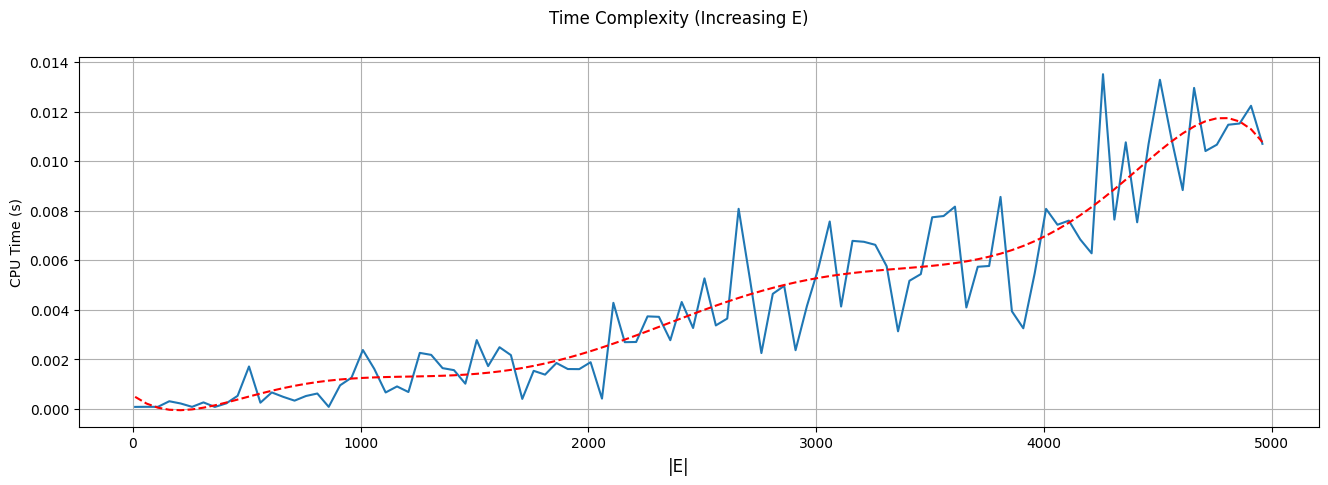

In [ ]:
arrayE = np.arange(10, 5001, 50)

# plotting trendline of the respective graphs
d = 7
z1 = np.polyfit(arrayE, timeTakenE, d)
p1 = np.poly1d(z1)

# s1 = (p1(timeTakenE) - np.min(p1(timeTakenE))) / (np.max(p1(timeTakenE)) - np.min(p1(timeTakenE)))

fig, ax1 = plt.subplots(1, 1, figsize=(16, 4.8))

fig.supxlabel("|E|")
fig.suptitle("Time Complexity (Increasing E)")
ax1.plot(arrayE, timeTakenE)
ax1.plot(arrayE, p1(arrayE), color="red", linestyle="--")
ax1.set_ylabel("CPU Time (s)")
# ax1.set_xticks(arrayE)
ax1.ticklabel_format(style="plain")
ax1.grid()

# Part B (Theoretical)

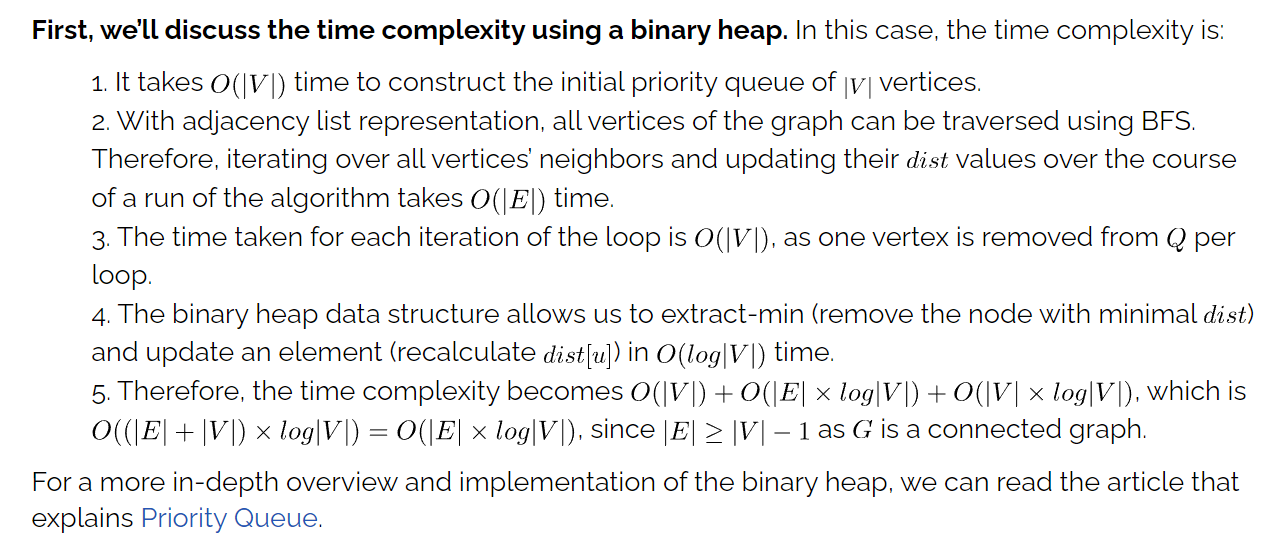

source: https://www.baeldung.com/cs/dijkstra-time-complexity

Graph with increasing V:

E will increase in tandem with V in order to maintain a connected graph. Hence, E ~= V, and we can estimate the time complexity from O(E*logV) to ~O(VlogV).

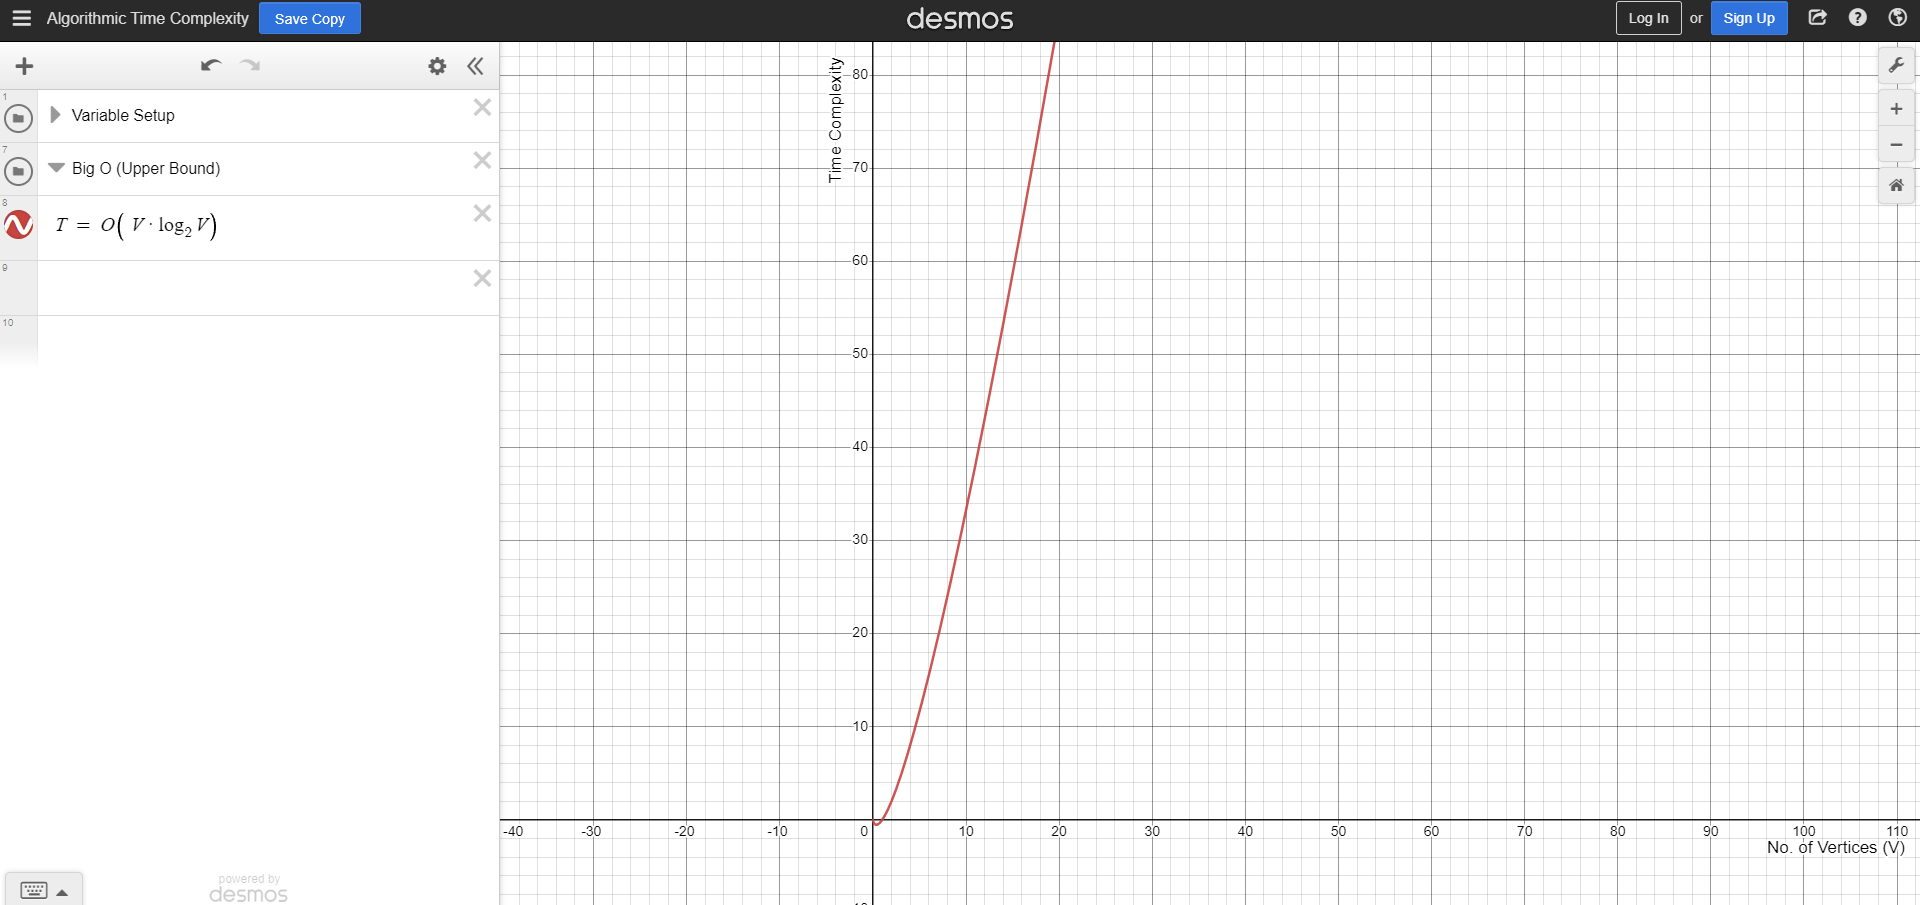

Graph with increasing E: (Assume V = 100)

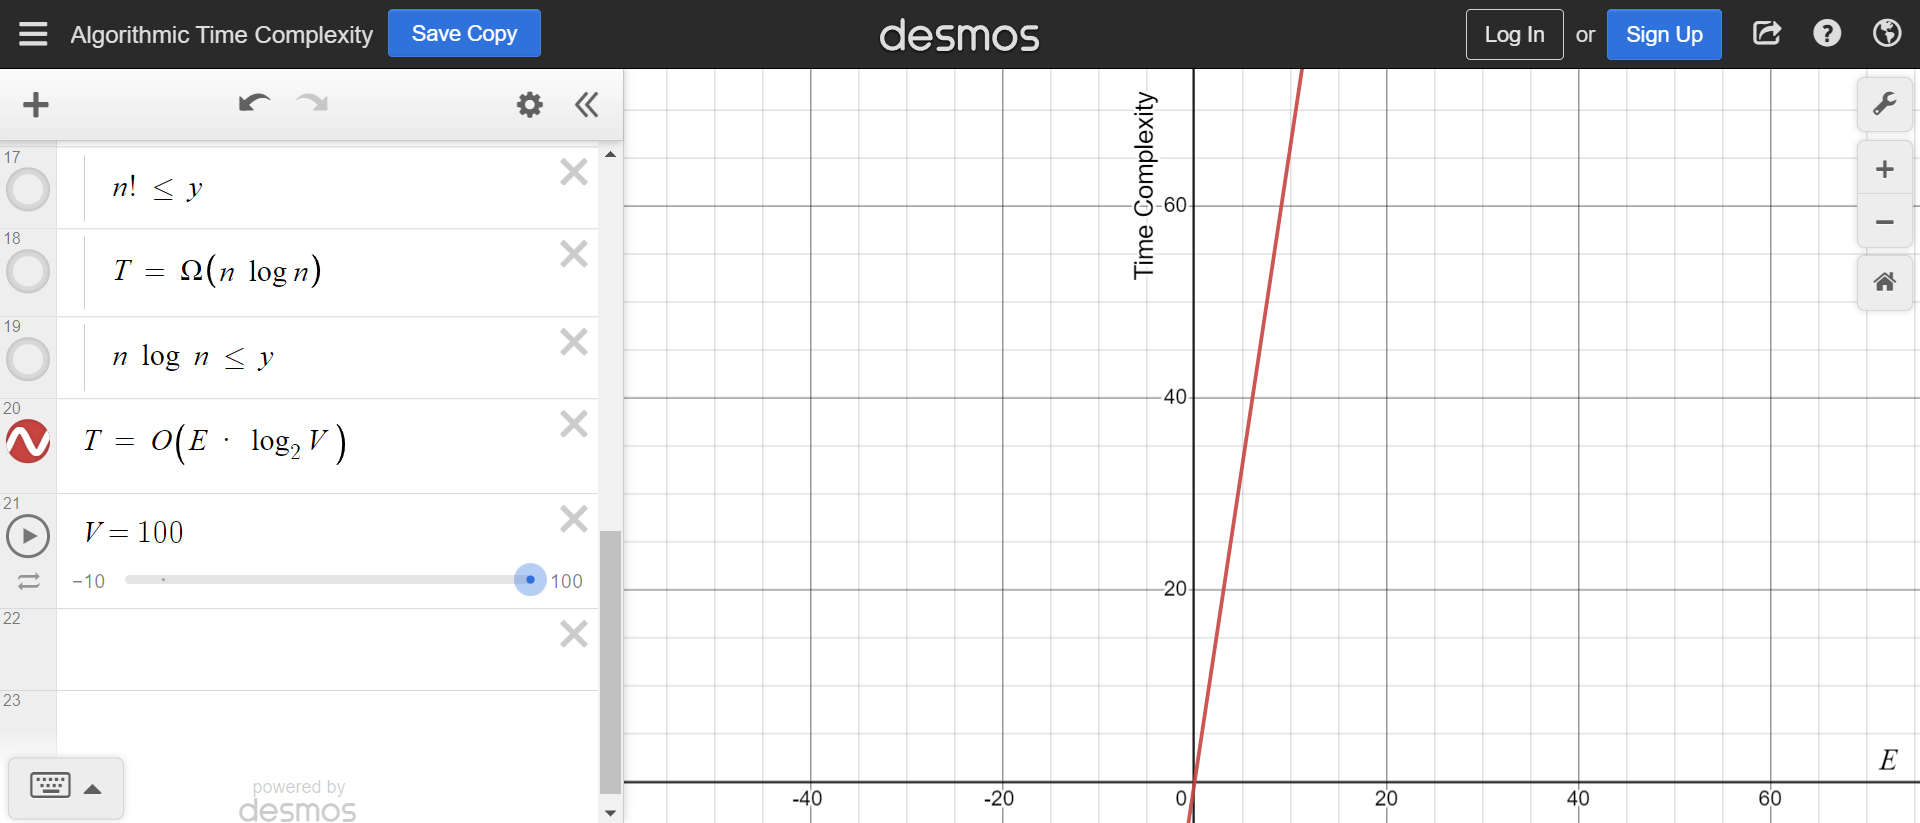

# Part B (Empirical)

CPU Time with increasing V

In [9]:
import heapq
from time import process_time, process_time_ns
import random
import matplotlib.pyplot as plt
import numpy as np


# this class represents a DIRECTED graph using adjacency list representation

class Graph:
  def __init__(self, V: int):
    self.V = V       # V is the no. of Vertices
    self.adj = [[] for _ in range(V)]    # if V = 3, initialise [[],[],[]]. This is adjacency list, template: [[(u1,w1),(u2,w2)],[(u1,w1)]]. Meaning for 0 index vertex, it is connected to vertex u with weight w.

  def addEdge(self, u: int, v: int, w: int):
    self.adj[u].append((v,w))
    self.adj[v].append((u,w))

  # self made method, may have errors
  def printGraph(self):
    # print(self.adj)
    for i in range(self.V):
      adjListArray = []
      for j in range(len(self.adj[i])):
        adjListArray.append(self.adj[i][j][0])
        # print(f"{i} -> {self.adj[j][0][0]}")
      print(f"{i} -> {adjListArray}")
    print(self.adj)


  # prints shortest path from src to other vertices
  def shortestPath(self, src: int):
    # create a priority queue to store vertices that are being preprocessed
    pq = []
    heapq.heappush(pq,(0,src))   # default format heapq.heappush(heap, item). (0,src) is the tuple. eg: [(0,src)]

    # create a vector for distances and initialise all distances as infinity (INF)
    dist = [float('inf')] * self.V    # eg: [inf, inf, inf, inf, inf, inf, inf, inf, inf]
    dist[src] = 0    # one eg: [0, inf, inf, inf, inf, inf, inf, inf, inf]

    while pq:  # pq is the priority queue
        d, u = heapq.heappop(pq)     # d is just the priority number which will be discarded upon popping, u is the vertex in focus for that particular iteration

        for v, weight in self.adj[u]:  # examing all the connections for that particular vertex u
          if dist[v] > dist[u] + weight:
            # relaxation
            dist[v] = dist[u] + weight
            # push the next connected vertex into the priority queue
            heapq.heappush(pq, (dist[v],v))    # pass in dist[v] in order to rank priority by distance since there may be mulitple vertices v connected to that vertex u



def arrayGenerate():
  import math
  loopArray = []
  i = 10
  # for i in range(10, 1000):
  while i <= 100:
    loopArray.append(i)
    # i+=math.floor(0.1*i)
    # i *= 5
    i += 15
  print('no. of vertices: ',loopArray)
  return loopArray


def programV(loopArray):
  # loopArray = [10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]   # no. of V
  """loopArray = []
  for i in range(10, 1000, i+=2i):
    loopArray.append(i)"""

  timeArray = []
  counter = -1
  for i in loopArray:
      # print(i)
      V = i
      g = Graph(V)
      counter +=1
      for j in range(loopArray[counter]):
        #print('j',j)
        #print('counter',loopArray[counter])
        if j < loopArray[counter]-1:    # might go out of index
          """randomNo = random.randint(1,20)
          g.addEdge(j,j+1,randomNo)    # (u,v,w)"""
          generateRandomEdges(g, int(1.2*g.V))
      # g.printGraph()
      start = process_time_ns()
      g.shortestPath(0)     # source vertex 0
      end = process_time_ns()
      processTime = end - start
      # print(processTime, 'ns')
      timeArray.append(processTime)
    # print('Sample Graph: ', g.printGraph())
      print('CPU times: ',timeArray)
  return timeArray

def plotV(timeArray, loopArray):
  # Data for plotting

  # x = [10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
  x = loopArray
  y = timeArray

  fig, ax = plt.subplots()
  ax.plot(x, y)

  ax.set(xlabel='Number of Vertices (V)', ylabel='CPU Time (nS)',
        title='Empirical Time Complexity')
  ax.grid()

  fig.savefig("test.png")
  plt.show()


""" loopArray = arrayGenerate()
timeArray = programV(loopArray)
plot(timeArray,loopArray)"""

' loopArray = arrayGenerate()\ntimeArray = programV(loopArray)\nplot(timeArray,loopArray)'

In [10]:
def programVprintGraph(V):
  g = Graph(V)
  for j in range(V):
    #print('j',j)
    #print('counter',loopArray[counter])
    if j < V-1:    # might go out of index
      randomNo = random.randint(1,20)
      g.addEdge(j,j+1,randomNo)    # (u,v,w)
  g.printGraph()

print("Sample graph: ")
programVprintGraph(10)

Sample graph: 
0 -> [1]
1 -> [0, 2]
2 -> [1, 3]
3 -> [2, 4]
4 -> [3, 5]
5 -> [4, 6]
6 -> [5, 7]
7 -> [6, 8]
8 -> [7, 9]
9 -> [8]
[[(1, 13)], [(0, 13), (2, 17)], [(1, 17), (3, 12)], [(2, 12), (4, 6)], [(3, 6), (5, 13)], [(4, 13), (6, 19)], [(5, 19), (7, 12)], [(6, 12), (8, 13)], [(7, 13), (9, 7)], [(8, 7)]]


In [11]:
def generate2RandomVertex(V, EdgesCount):
  """
  V = 100    # no of vertices fixed at 100 to vary no of edges
  g = Graph(V)    # generate graph of nodes with no edges"""

  # successfulCounter = 0

  for i in range(EdgesCount):
  #while successfulCounter < EdgesCount:  (infinite loop)
    randomNo = random.randint(1,20)  # weight ranges from 1 to 20
    randomVertex1 = random.randint(0,V-1)    #V-1 due to indexing. vertices start from 0 to 99
    # print(randomVertex1)
    VArray = []   # for choosing randomVertex2 to avoid clashing with randomVertex1
    for i in range(V):
      VArray.append(i)
    randomArray = [x for x in VArray if x != randomVertex1]    # list comprehension
    randomVertex2 = random.choice(randomArray)      # to make sure randomVertex2 != randomVertex1
  return randomVertex1,randomVertex2


def processExistingEdge(g, randomVertex1, randomVertex2, EdgesCount):
  # check if randomVertex1 is already connected to randomVertex2. keep changing number if so
  #print("len(g.adj[randomVertex1]): ", len(g.adj[randomVertex1]))
  if len(g.adj[randomVertex1]) != 0:
    for i in range(len(g.adj[randomVertex1])): # 0 to len(g.adj[randomVertex1])-1
      if len(g.adj[randomVertex1]) != 0:
        continue
      """print("g.adj[randomVertex1]): ", g.adj[randomVertex1])
      print("randomvertex1: ", randomVertex1)
      print("randomvertex2: ", randomVertex2)
      print("i: ", i)
      print(g.adj)
      print("g.adj[randomVertex1][i][0]: ", g.adj[randomVertex1][i][0])"""
      #print(type(g.adj[randomVertex1][i][0]))
      temp = g.adj[randomVertex1][i][0]
      if g.adj[randomVertex1][i][0] == randomVertex2:  # if the vertex edge exists
          print('edge already exists. finding another...')
          while temp == randomVertex2:
            # change randomVertex pairing by regenerating
            resultTuple = generate2RandomVertex(g.V, EdgesCount)
            randomVertex1 = resultTuple[0]
            randomVertex2 = resultTuple[1]
            # processExistingEdge(g, resultTuple[0], resultTuple[1], EdgesCount)
  return randomVertex1, randomVertex2

def generateRandomEdges(g, EdgesCount):
  # g = Graph(V)
  for j in range(g.V):
    #print('j',j)
    #print('counter',loopArray[counter])
    if j < g.V-1:    # might go out of index
      randomNo = random.randint(1,20) # weight number
      resultTuple = generate2RandomVertex(g.V, EdgesCount)
      resultTuple = processExistingEdge(g, resultTuple[0], resultTuple[1], EdgesCount)
      g.addEdge(resultTuple[0],resultTuple[1],randomNo)    # (u,v,w)
  #g.printGraph()


def programVprintGraph2(g, EdgesCount):
  # g = Graph(V)
  for j in range(g.V):
    #print('j',j)
    #print('counter',loopArray[counter])
    if j < g.V-1:    # might go out of index
      randomNo = random.randint(1,20) # weight number
      resultTuple = generate2RandomVertex(g.V, EdgesCount)
      resultTuple = processExistingEdge(g, resultTuple[0], resultTuple[1], EdgesCount)
      g.addEdge(resultTuple[0],resultTuple[1],randomNo)    # (u,v,w)
  g.printGraph()

g = Graph(100)
print("Sample Graph: ")
programVprintGraph2(g, 150)

Sample Graph: 
0 -> [70, 14]
1 -> [99, 65, 26, 6, 17]
2 -> [38, 60, 6, 25]
3 -> [68, 70, 55]
4 -> [25, 63, 40, 46]
5 -> [81]
6 -> [66, 2, 17, 1]
7 -> [68, 87]
8 -> [36, 89, 51]
9 -> [43, 15, 52]
10 -> [97, 49]
11 -> [25, 30, 95, 54]
12 -> [84, 37]
13 -> [85, 69]
14 -> [0]
15 -> [45, 9]
16 -> [86, 67]
17 -> [6, 66, 54, 1]
18 -> [87]
19 -> [32]
20 -> [58]
21 -> [26]
22 -> [46, 84, 88, 62, 30]
23 -> [52]
24 -> [96]
25 -> [11, 69, 97, 2, 4]
26 -> [59, 83, 21, 1]
27 -> []
28 -> [61, 70]
29 -> [98]
30 -> [11, 22]
31 -> [40, 64]
32 -> [19]
33 -> [55, 99]
34 -> [38]
35 -> [97]
36 -> [52, 39, 75, 8]
37 -> [92, 12]
38 -> [2, 34]
39 -> [36]
40 -> [31, 4]
41 -> [91, 55]
42 -> []
43 -> [9]
44 -> []
45 -> [15, 91]
46 -> [22, 77, 4]
47 -> [62]
48 -> []
49 -> [10]
50 -> []
51 -> [93, 8]
52 -> [36, 56, 9, 23]
53 -> [89]
54 -> [61, 73, 11, 17]
55 -> [33, 41, 3]
56 -> [52, 76]
57 -> [58]
58 -> [20, 57, 95]
59 -> [26, 73, 89]
60 -> [2]
61 -> [28, 54]
62 -> [68, 22, 47]
63 -> [4]
64 -> [31]
65 -> [1]
66 ->

no. of vertices:  [10, 25, 40, 55, 70, 85, 100]
CPU times:  [144974]
CPU times:  [144974, 381368]
CPU times:  [144974, 381368, 1111982]
CPU times:  [144974, 381368, 1111982, 2279086]
CPU times:  [144974, 381368, 1111982, 2279086, 3853352]
CPU times:  [144974, 381368, 1111982, 2279086, 3853352, 6194428]
CPU times:  [144974, 381368, 1111982, 2279086, 3853352, 6194428, 8408623]


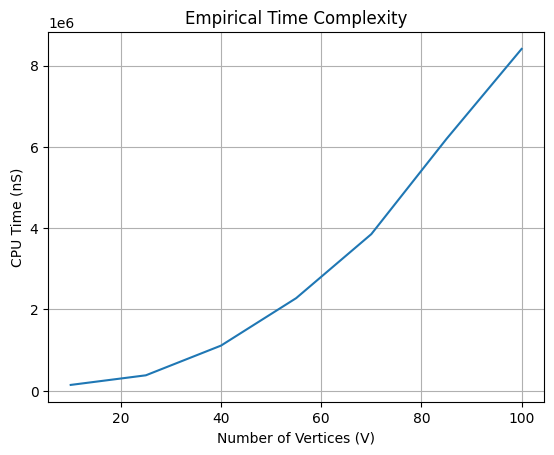

In [12]:
loopArray = arrayGenerate()
timeArray = programV(loopArray)
plotV(timeArray,loopArray)

CPU Time with increasing E    (no. of V fixed at 100)

In [18]:

# make method to set no of edges in an empty graph
def setNumOfEdges(V, g, EdgesCount):
  """
  V = 100    # no of vertices fixed at 100 to vary no of edges
  g = Graph(V)    # generate graph of nodes with no edges"""

  for i in range(EdgesCount):
    randomNo = random.randint(1,20)  # weight ranges from 1 to 20
    randomVertex1 = random.randint(0,V-1)    #V-1 due to indexing. vertices start from 0 to 99
    # print(randomVertex1)
    VArray = []
    for i in range(V):
      VArray.append(i)
    randomArray = [x for x in VArray if x != randomVertex1]    # list comprehension
    randomVertex2 = random.choice(randomArray)      # to make sure randomVertex2 != randomVertex1
    # print(randomVertex2)
    g.addEdge(randomVertex1,randomVertex2,randomNo)

  #g.printGraph()

"""
graph = programE()
noOfEdges(graph)"""

# setNumOfEdges(500)

'\ngraph = programE()\nnoOfEdges(graph)'

In [17]:
setNumOfEdges(100,g,300)

0 -> [70, 14, 12, 28, 17, 56, 74, 3, 70, 57, 17, 2, 79, 15, 32, 21, 99, 1, 37]
1 -> [99, 65, 26, 6, 17, 3, 97, 37, 51, 31, 51, 74, 68, 0]
2 -> [38, 60, 6, 25, 34, 50, 76, 79, 97, 0, 9, 15, 94, 69, 3, 73, 63, 62, 15]
3 -> [68, 70, 55, 1, 81, 74, 93, 0, 58, 51, 25, 57, 55, 40, 2, 25]
4 -> [25, 63, 40, 46, 30, 86, 9, 89, 26, 79, 24]
5 -> [81, 29, 45, 97, 48, 96, 70, 68, 41, 46, 64]
6 -> [66, 2, 17, 1, 45, 74, 77, 40, 97, 79, 93, 51, 22, 71, 91, 63, 10, 18, 89]
7 -> [68, 87, 31, 93, 50, 87, 75, 82, 59, 66, 22, 98]
8 -> [36, 89, 51, 73, 90, 24, 47, 99, 19, 50, 95, 82, 15, 98]
9 -> [43, 15, 52, 4, 25, 27, 10, 24, 57, 35, 2, 29, 54, 19, 40, 14]
10 -> [97, 49, 47, 49, 54, 44, 49, 37, 99, 9, 73, 63, 18, 42, 6, 15, 65, 48, 26]
11 -> [25, 30, 95, 54, 93, 56, 89, 27, 22, 50, 64, 67, 34, 62]
12 -> [84, 37, 0, 76, 97, 53, 25, 61, 76, 42, 55, 37, 36, 79, 18]
13 -> [85, 69, 28, 93, 32, 50, 58, 91, 22, 93, 17, 15]
14 -> [0, 72, 72, 43, 45, 61, 52, 34, 96, 96, 18, 38, 33, 73, 93, 25, 9]
15 -> [45, 9, 93

In [19]:
def arrayGenerateE():
  import math
  loopArray = []
  i = 10
  # for i in range(10, 1000):
  while i <= 5000:
    loopArray.append(i)
    # i+=math.floor(0.1*i)
    # i *= 5
    i += 50
  print('no. of edges: ',loopArray)
  return loopArray

def programE():
  V = 100    # no of vertices fixed at 100 to vary no of edges
  g = Graph(V)    # generate graph of nodes with no edges
  timeArray = []
  loopArray = arrayGenerateE()
  for i in loopArray:
    setNumOfEdges(V, g, i)
    start = process_time_ns()
    g.shortestPath(0)  # frm src vertex 0
    end = process_time_ns()
    timeTaken = end - start
    timeArray.append(timeTaken)
  return timeArray

timeArrayE = programE()
print(timeArrayE)

no. of edges:  [10, 60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610, 660, 710, 760, 810, 860, 910, 960, 1010, 1060, 1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610, 1660, 1710, 1760, 1810, 1860, 1910, 1960, 2010, 2060, 2110, 2160, 2210, 2260, 2310, 2360, 2410, 2460, 2510, 2560, 2610, 2660, 2710, 2760, 2810, 2860, 2910, 2960, 3010, 3060, 3110, 3160, 3210, 3260, 3310, 3360, 3410, 3460, 3510, 3560, 3610, 3660, 3710, 3760, 3810, 3860, 3910, 3960, 4010, 4060, 4110, 4160, 4210, 4260, 4310, 4360, 4410, 4460, 4510, 4560, 4610, 4660, 4710, 4760, 4810, 4860, 4910, 4960]
[13849, 9530, 238084, 400232, 421857, 583086, 766676, 1007094, 1263624, 1980916, 1950956, 2429429, 2860198, 3672952, 4299063, 4526860, 5027236, 5948846, 6502651, 10210594, 9605206, 9881452, 11843916, 13470793, 13987320, 15784679, 18864065, 18804103, 39151054, 39432640, 25923836, 27671348, 28083600, 33577577, 39595261, 38062601, 38023468, 49054038, 70740762, 68835103, 49814603, 62262389, 58510076, 584024

no. of edges:  [10, 60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610, 660, 710, 760, 810, 860, 910, 960, 1010, 1060, 1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610, 1660, 1710, 1760, 1810, 1860, 1910, 1960, 2010, 2060, 2110, 2160, 2210, 2260, 2310, 2360, 2410, 2460, 2510, 2560, 2610, 2660, 2710, 2760, 2810, 2860, 2910, 2960, 3010, 3060, 3110, 3160, 3210, 3260, 3310, 3360, 3410, 3460, 3510, 3560, 3610, 3660, 3710, 3760, 3810, 3860, 3910, 3960, 4010, 4060, 4110, 4160, 4210, 4260, 4310, 4360, 4410, 4460, 4510, 4560, 4610, 4660, 4710, 4760, 4810, 4860, 4910, 4960]


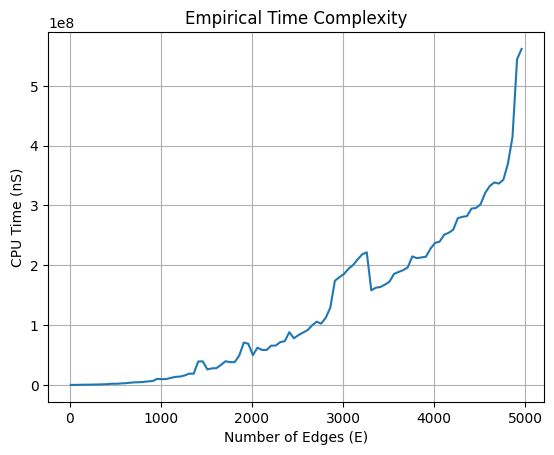

In [20]:
def plotE(timeArray, loopArray):
  # Data for plotting

  # x = [10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
  x = loopArray
  y = timeArray

  fig, ax = plt.subplots()
  ax.plot(x, y)

  ax.set(xlabel='Number of Edges (E)', ylabel='CPU Time (nS)',
        title='Empirical Time Complexity')
  ax.grid()

  fig.savefig("test.png")
  plt.show()

loopArrayE = arrayGenerateE()
plotE(timeArrayE, loopArrayE)

#Old Code

In [21]:

import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
X = arrayE

# Assign variables to the y axis part of the curve
y = timeTakenE
z = timeArrayE


# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='implementation1')
plt.plot(X, z, color='g', label='implementation2')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Edges")
plt.ylabel("CPU Time")
plt.title("CPU time for increasing number of edges")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

NameError: ignored